<a href="https://colab.research.google.com/github/romanmarsalekBUT/MPA-MLF_materials/blob/main/MPA_MLF_SVM_2students_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:


In [41]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Split data into training and testing parts:

In [42]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
X.shape

(120, 4)
(30, 4)


(150, 4)

Use a Support Vector Machine for classification:


In [43]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [44]:
from sklearn.svm import SVC
X2 = X[iris.target!=2,0:2]
y2 = y[iris.target!=2]
#X = iris.data[:,0:2]
#y = iris.target

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2)
print(X_train2.shape)
print(X_test2.shape)

(80, 2)
(20, 2)


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

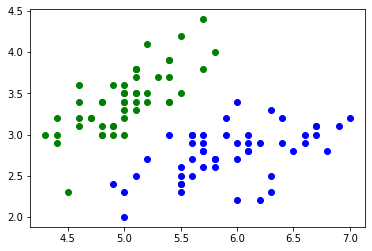

In [48]:
import matplotlib.pyplot as plot 
plot.scatter(X[y==0,0], X[y==0,1], color = 'green')
plot.scatter(X[y==1,0], X[y==1,1], color = 'blue')
#plot.scatter(X[y==2,0], X[y==2,1], color = 'red')
plot.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [49]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train2,y_train2)
SVMmodel.get_params()
SVMmodel.score(X_test2,y_test2)

1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

(15, 2)
[[ 2.22080785 -2.22156111]]
[-4.99470002]
[4.3        4.32727273 4.35454545 4.38181818 4.40909091 4.43636364
 4.46363636 4.49090909 4.51818182 4.54545455 4.57272727 4.6
 4.62727273 4.65454545 4.68181818 4.70909091 4.73636364 4.76363636
 4.79090909 4.81818182 4.84545455 4.87272727 4.9        4.92727273
 4.95454545 4.98181818 5.00909091 5.03636364 5.06363636 5.09090909
 5.11818182 5.14545455 5.17272727 5.2        5.22727273 5.25454545
 5.28181818 5.30909091 5.33636364 5.36363636 5.39090909 5.41818182
 5.44545455 5.47272727 5.5        5.52727273 5.55454545 5.58181818
 5.60909091 5.63636364 5.66363636 5.69090909 5.71818182 5.74545455
 5.77272727 5.8        5.82727273 5.85454545 5.88181818 5.90909091
 5.93636364 5.96363636 5.99090909 6.01818182 6.04545455 6.07272727
 6.1        6.12727273 6.15454545 6.18181818 6.20909091 6.23636364
 6.26363636 6.29090909 6.31818182 6.34545455 6.37272727 6.4
 6.42727273 6.45454545 6.48181818 6.50909091 6.53636364 6.56363636
 6.59090909 6.61818182 6.6

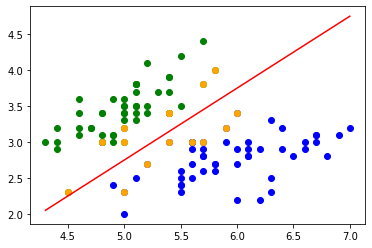

In [51]:
import numpy as np

supvectors=SVMmodel.support_vectors_
# Plot the support vectors here
print(supvectors.shape)

plot.scatter(X2[y2==0,0], X2[y2==0,1], color = 'green')
plot.scatter(X2[y2==1,0], X2[y2==1,1], color = 'blue')
plot.scatter(supvectors[:,0], supvectors[:,1], color = 'orange')

#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
print(W)
print(b)

W = W.tolist()[0]
decline_x = np.linspace(min(X2[:,0]), max(X2[:,0]), 100)
decline_y = -W[0]/W[1]*decline_x-b/W[1]
plot.plot(decline_x, decline_y, c = 'red')
print(decline_x)

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

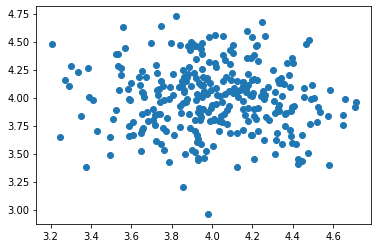

In [52]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plot.scatter(x[:,0], x[:,1])
plot.show()

Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

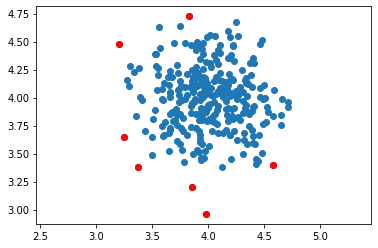

In [53]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plot.scatter(x[:,0], x[:,1])
plot.scatter(values[:,0], values[:,1], color='red')
plot.axis('equal')
plot.show()

Plot the support vectors:

(10, 2)


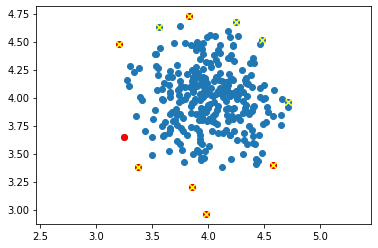

In [59]:
plot.scatter(x[:,0], x[:,1])
plot.axis('equal')

supvectors2 = SVMmodelOne.support_vectors_
print(supvectors2.shape)

plot.scatter(values[:,0], values[:,1], color='red')
plot.scatter(supvectors2[:,0], supvectors2[:,1], color = 'yellow', marker = 'x')
plot.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.989098620408397


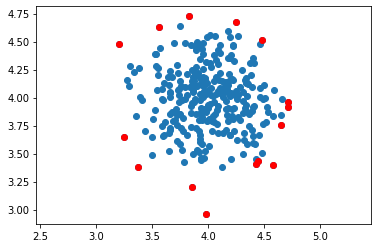

In [62]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.05)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plot.scatter(x[:,0], x[:,1])
plot.scatter(values[:,0], values[:,1], color='red')
plot.axis('equal')
plot.show()